# outlier handeling using IQR METHOD

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

C:\Users\Harshit\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
data = np.array([23, 25, 22, 27, 21, 24, 26, 100, 23, 28, 22, 29])

# Calculate mean and standard deviation
mean = np.mean(data)
std_dev = np.std(data)

# Set Z-score threshold
z_threshold = 2

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in data]

# Identify outliers
outliers = [data[i] for i, z in enumerate(z_scores) if abs(z) > z_threshold]

print("Original Data:", data)
print("Outliers detected using Z-score:", outliers)

Original Data: [ 23  25  22  27  21  24  26 100  23  28  22  29]
Outliers detected using Z-score: [100]


In [3]:
arr=np.array([1,2,3,4,5,6,7,8,9,99])
std_dev=np.std(arr)
mean= np.mean(arr)
max_allowed=2
#  calculating z score for each number in array
z_scores=[]
for i in arr:
    z_scores.append((i-mean)/std_dev)
# print(z_scores)
#  finding outlier 
for i in arr:
    if abs(z_scores[i]>max_allowed):
        print(arr[i])
        break
    


99


In [4]:
df= pd.read_csv('scholarship.csv')

In [5]:
df

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1


In [6]:
df.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


C:\Users\Harshit\AppData\Local\Temp\ipykernel_16440\4022436245.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["scholarship_exam_marks"])   #skewed plot
C:\Users\Harshit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='scholarship_exam_marks', ylabel='Density'>

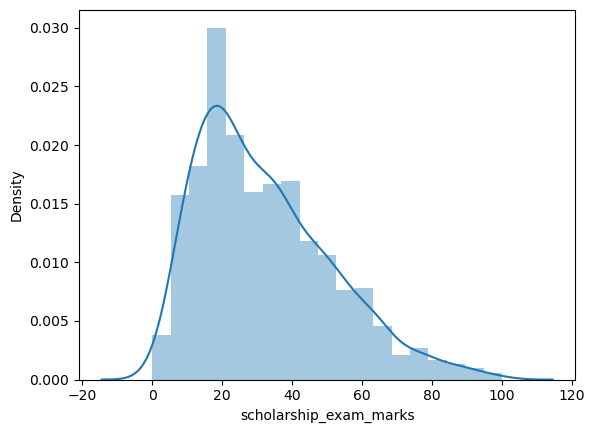

In [7]:
sns.distplot(df["scholarship_exam_marks"])   #skewed plot

In [8]:
df["scholarship_exam_marks"].skew()

0.8356419499466834

In [9]:
df["scholarship_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

<Axes: >

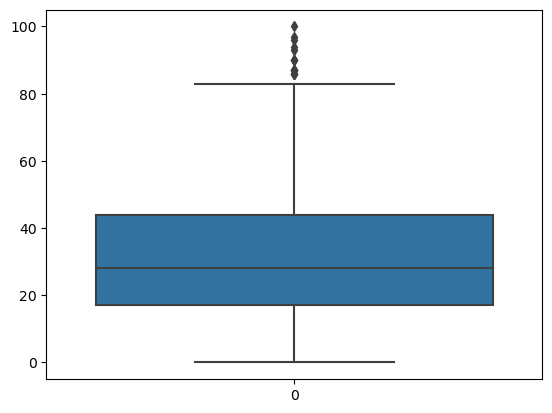

In [10]:
sns.boxplot(df["scholarship_exam_marks"])

In [11]:
df['scholarship_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: scholarship_exam_marks, dtype: float64

In [12]:
Q1= df['scholarship_exam_marks'].quantile(0.25)
Q3=df['scholarship_exam_marks'].quantile(0.75)

In [13]:
Q1

17.0

In [14]:
Q3

44.0

In [15]:
IQR= Q3-Q1

In [16]:
least_allowed = Q1-1.5*IQR
max_allowed = Q3+1.5*IQR

In [17]:
print('least_allowed value = ',least_allowed)
print('max_allowed value = ',max_allowed)

least_allowed value =  -23.5
max_allowed value =  84.5


In [18]:
# finding the outliers 
for i in df['scholarship_exam_marks']:
    if i<least_allowed or i>max_allowed:
        print(i)

94
86
86
93
90
87
87
87
90
96
87
90
86
97
100


## triming

In [19]:
df[(df['scholarship_exam_marks']>max_allowed) | (df['scholarship_exam_marks']<least_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
9,77.5,94,1
40,66.0,86,1
61,75.1,86,0
134,63.3,93,0
162,78.0,90,0
283,70.9,87,0
290,83.8,87,0
311,69.7,87,1
324,66.4,90,0
630,65.6,96,1


In [20]:
 DF=df[(df['scholarship_exam_marks']<max_allowed) & 
   (df['scholarship_exam_marks']>least_allowed)]

In [21]:
DF

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
998,86.2,46,1
